# TP2 - MCMC

## Estimation avancée - G3 SDIA

Dans ce TP, on s'intéresse aux méthodes d'échantillonnage dites "MCMC" (Monte Carlo par Chaînes de Markov). Le premier exercice consiste à implémenter un Metropolis-Hastings et de regarder l'influence de quelques paramètres. Le deuxième exercice mettra en oeuvre une méthode de régression bayésienne linéaire (disponible dans un deuxième notebook).

### Instructions

1. Renommer votre notebook sous la forme `tp2a_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 10 Décembre 2023, 23h59.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

### Partie 1 - Metropolis-Hastings

Dans cet exercice, on cherche à générer des échantillons d'une loi appelée *skew-normal* (cf. [Wikipedia](https://en.wikipedia.org/wiki/Skew_normal_distribution)). C'est une loi à support sur $\mathbb{R}$ à trois paramètres : $\alpha \in \mathbb{R}$ (paramètre de skewness), $\xi \in \mathbb{R}$ (paramètre de position), et $\sigma > 0$ (paramètre d'échelle). Dans ce TP nous prendrons $\alpha = 4, \xi = 0, \sigma = 3$.

L'objectif est d'implémenter un algorithme Metropolis-Hastings (MH) avec une loi instrumentale Gaussienne $\mathcal{N}(x_n, \sigma_0^2)$ (i.e., centrée en l'état courant, de variance $\sigma_0^2$).

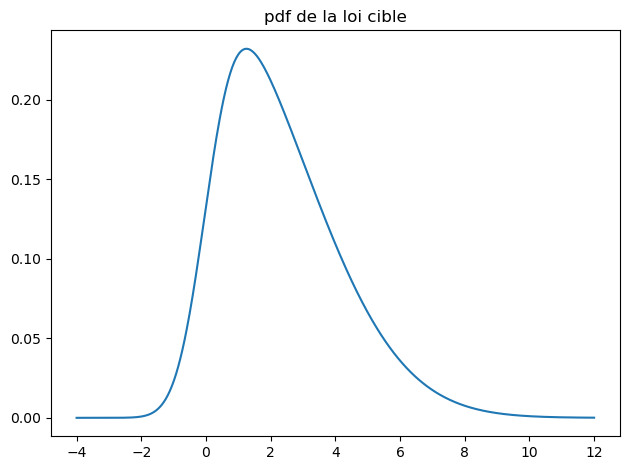

In [2]:
# pdf of the target distribution
a = 4
lc = 0
sc = 3
x = np.linspace(-4,12,500)
y = ss.skewnorm.pdf(x, a, loc=lc, scale=sc)
plt.plot(x,y)
plt.title('pdf de la loi cible')
plt.tight_layout()

**Q1.** Écrire une fonction qui implémente l'algorithme MH proposé, prenant comme arguments :
* La taille de la chaine N
* L'état initial $x_0$
* L'écart-type $\sigma_0$ de la *proposal* gaussienne
* Une graine aléatoire

Pensez à utiliser les fonctions implémentées dans `scipy.stats` pour les pdfs !

In [3]:
def metropolis_hastings(N, x0, s, seed):
    np.random.seed(seed)
    x = np.zeros(N)
    x[0] = x0
    for i in range(1,N):
        # sample from the proposal distribution
        x_star = np.random.normal(x[i-1], s)
        # compute the acceptance ratio
        dom = (ss.skewnorm.pdf(x_star, a, lc, sc)*ss.norm.pdf(x[i-1], x_star, s))
        num = (ss.skewnorm.pdf(x[i-1], a, lc, sc)*ss.norm.pdf(x_star, x[i-1], s))
        alpha = min(1, dom/num)
        # accept or reject the sample
        u = np.random.uniform()
        if u < alpha:
            x[i] = x_star
        else:
            x[i] = x[i-1]
    return x

**Q2**. Prendre $N = 1000, x_0 = 1$. Afficher les *traceplots* (échantillons en fonction de $n$) de la chaine pour des valeurs différentes de $\sigma$ : $0.1, 2, 40$.

Pour chacun des cas, comparer la pdf de la loi cible à une estimation par noyaux de la densité ou un histogramme. Commenter.

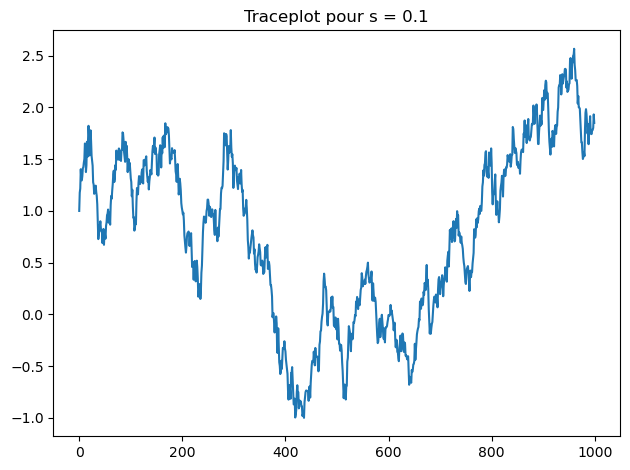

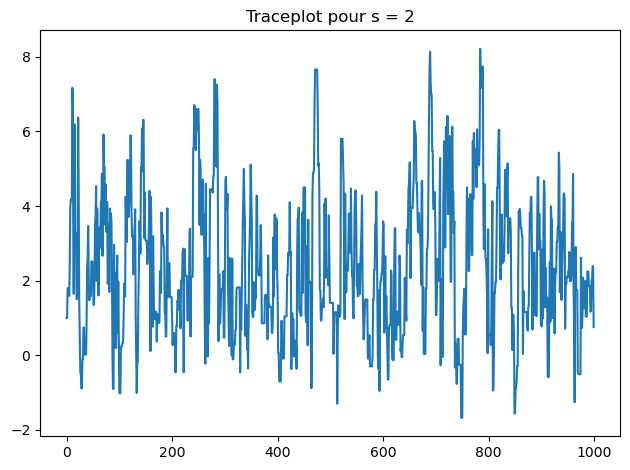

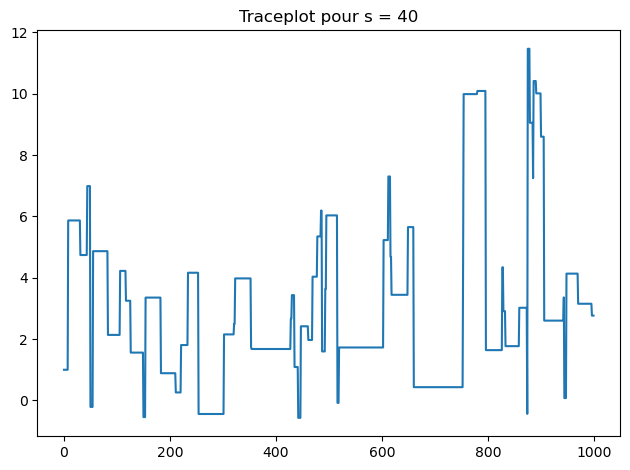

In [4]:
N = 1000
x0 = 1
s_tab = [0.1, 2, 40]
seed = 0
for s in s_tab:
    x = metropolis_hastings(N, x0, s, seed)
    plt.figure()
    plt.plot(x)
    plt.title('Traceplot pour s = '+str(s))
    plt.tight_layout()

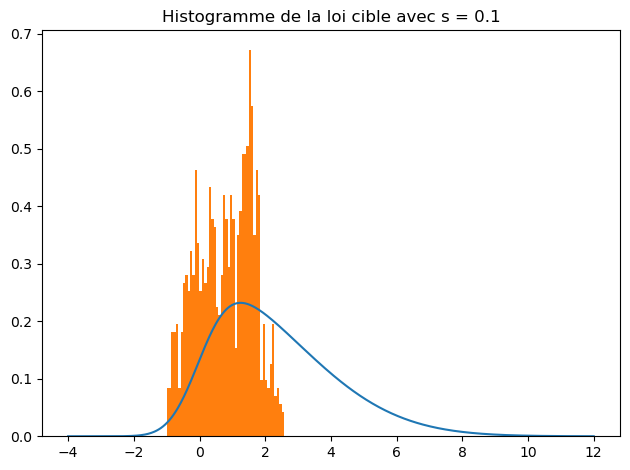

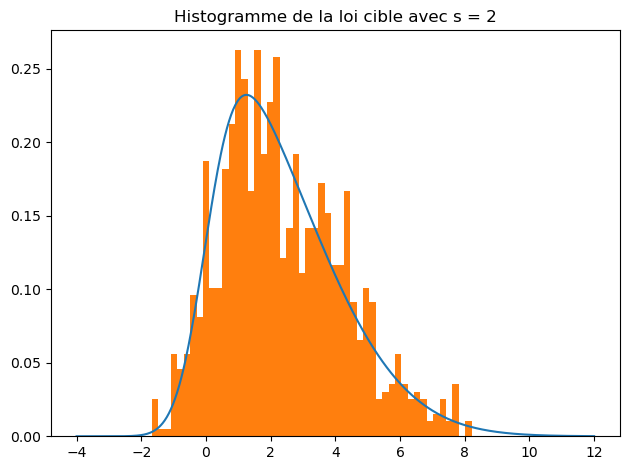

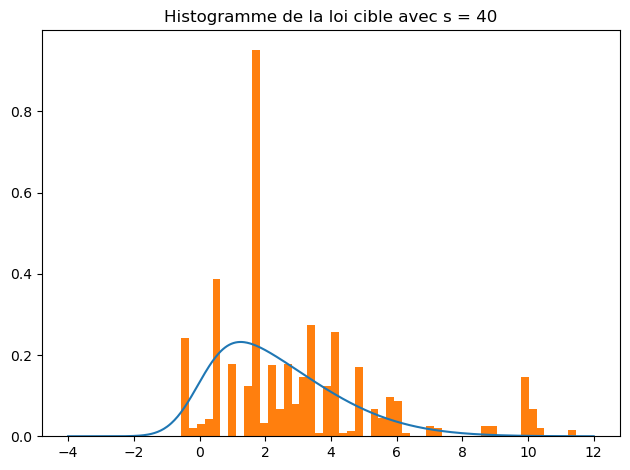

In [13]:
N = 1000
x0 = 1
s_tab = [0.1, 2, 40]
seed = 0
for s in s_tab:
    x = metropolis_hastings(N, x0, s, seed)
    plt.figure()
    y = ss.skewnorm.pdf(np.linspace(-4,12,500), a, lc, sc)
    plt.plot(np.linspace(-4,12,500),y, label='pdf théorique')
    plt.hist(x, bins=50, density=True)
    plt.title('Histogramme de la loi cible avec s = '+str(s))
    plt.tight_layout()


__Remarques :__ 
- loi instrumentale Gaussienne avec $\sigma_0^2 = 2$ est le plus adapté pour cette loi cible.
- pour $\sigma_0^2 = 0.1$, la chaine est très lente à converger. Pour $\sigma_0^2 = 40$, la chaine est très rapide à converger mais les sauts sont trop grands.

**Q3.** Prendre $N = 1000, s = 2$. Afficher les *traceplots* pour $x_0$ valant 0 et 50.

Pour chacun des cas, comparer la pdf de la loi cible à une estimation par noyaux de la densité ou un histogramme. Commenter.

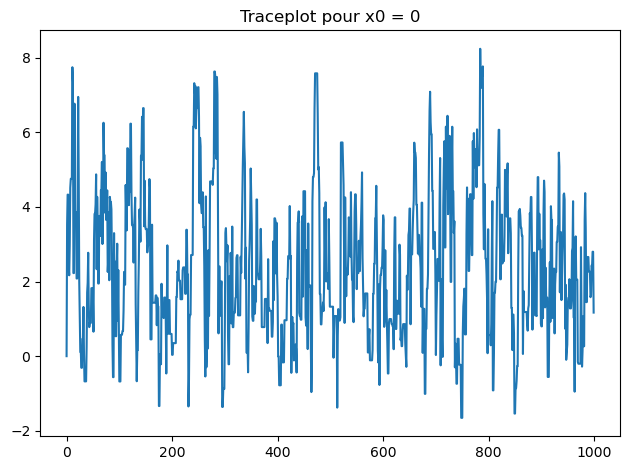

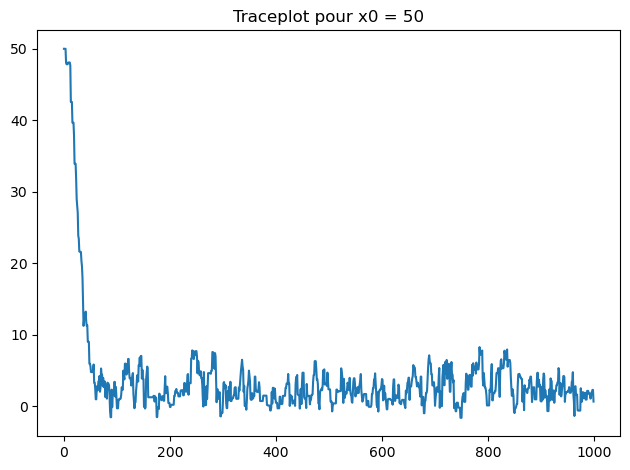

In [14]:
N = 1000
s = 2
x0_tab = [0, 50]
seed = 0
for x0 in x0_tab:
    x = metropolis_hastings(N, x0, s, seed)
    plt.figure()
    plt.plot(x)
    plt.title('Traceplot pour x0 = '+str(x0))
    plt.tight_layout()

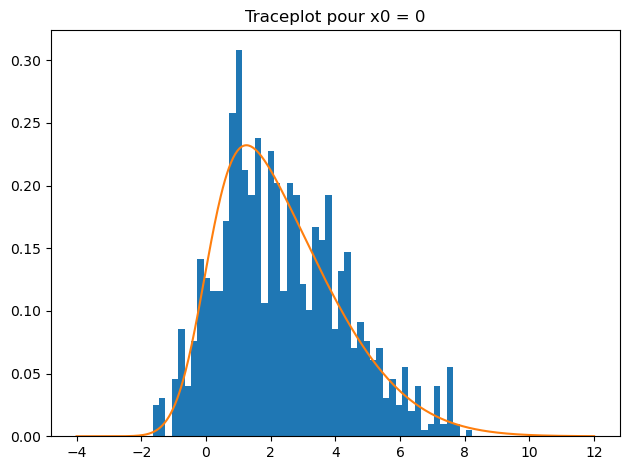

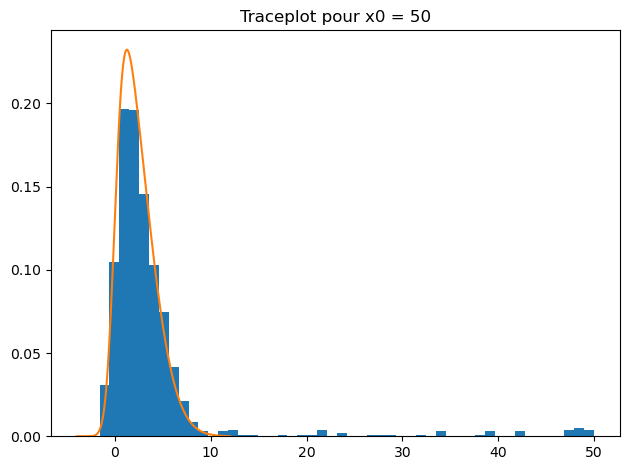

In [15]:
N = 1000
s = 2
x0_tab = [0, 50]
seed = 0
for x0 in x0_tab:
    x = metropolis_hastings(N, x0, s, seed)
    plt.figure()
    plt.hist(x, bins=50, density=True)
    y = ss.skewnorm.pdf(np.linspace(-4,12,500), a, lc, sc)
    plt.plot(np.linspace(-4,12,500),y, label='pdf théorique')
    plt.title('Traceplot pour x0 = '+str(x0))
    plt.tight_layout()

__Remarque :__ On remarque que $x_0$ n'influence que les premiers échantillons de la chaines et c'est pour cela qu'on parle de *burn-in* qui consiste à supprimer les premiers échantillons de la chaine.